# Project 3- Spatial Transcriptomics
Deadline: 19.01.2025, 23:59

## Introduction to Seurat
The tool that you will mainly use in this project is Seurat, a tool you are already familiar with in project 1. Seurat includes the functionality to explicitly analyze spatial transcriptomics data. A tutorial and good introduction can be found here

## Download the data
You can download the dataset for this project under the following link: https://icbb-share.s3.eu-central-1.amazonaws.com/single-cell-bioinformatics/scbi_p3.zip

## System setup
Before you start programming, you should set up the system as following:

    devtools::install_github("sqjin/CellChat")

In [1]:
set.seed(42)

In [2]:
library(dplyr)
# library(spatstat.core)
library(Seurat)
library(patchwork)
library(DoubletFinder)
library(SingleR)
# library(enrichR)
library(CellChat)
library(SingleCellExperiment)
library(SeuratWrappers)
library(tidyverse)
# library(monocle3)
library(celldex)
library(hdf5r)
library(glmGamPoi)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.0 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The follo

***

# Week 1: (9 Points +3 Bonus)
## 1 Spatial Transcriptomics (Bonus: 5P)
10X genomics Visum technology. The given data set is a spatial transcriptomics data set of a mouse brain. It has been aligned and prepared using the Space Ranger software.

### 1.1 Properties of the Slides (1P)
Give the size of the point, the distance between points, and the number of points for this technology.

In [3]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"

list.files(section1_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

print(section1_data)


[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

An object of class Seurat 
32285 features across 3355 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1


### 1.2 Resolution of the spatial transcriptomics technology (1P)
Compare the technology’s resolution with the size of an average eukaryotic cell and explain what this means when dealing with the data.

In [4]:
average_cell_size <- 10
resolution_comment <- "The resolution of this technology is approximately 10 times larger than the size of an average eukaryotic cell. This means that each spot represents gene expression averaged over multiple cells."
cat(resolution_comment, "\n")

The resolution of this technology is approximately 10 times larger than the size of an average eukaryotic cell. This means that each spot represents gene expression averaged over multiple cells. 


### 1.3 Output of Space Ranger (1P)
Have a first look at the given data. Provide the image taken of the sample, the coordinates of the spots, and one gene-expression matrix.

In [5]:
# Extract gene expression data
gene_expression_section1 <- GetAssayData(section1_data, assay = "Spatial", slot = "counts")

print(gene_expression_section1)

# Display metadata for Section 1
metadata_section1 <- section1_data@meta.data
head(metadata_section1)

Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
i Please use the `layer` argument instead."


32285 x 3355 sparse Matrix of class "dgCMatrix"


  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]

  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]



                                                                                          
Xkr4           .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm1992         .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm19938        .  1  .  .  .  .  .  .  .  .  .  .  1  .  .  .  .  .  .   .  .   .  .  .  .
Gm37381        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Rp1            .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Sox17          .  .  .  .  .  .  .  1  .  .  .  .  .  .  .  .  .  .  1   .  .   .  .  .  .
Gm37587        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Gm37323        .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .   .  .  .  .
Mrpl15         .  1  1  .  1  .  .  1  2  .  .  1  2  .  3  .  2  1  3   3  .   3  1  .  .
Lypla1         .  2  .  1  .  .  .  .  .  2  3  1  2  1  3  1  .  .  1   1  .   2  1  .  .

  [[ suppressing 32 column names 'AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1' ... ]]



                                                                                           
Hprt             .   4   5   1   4   .   3   2   3   5   2  .   5   5   16   9    1   3   2
Gm28730          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
C430049B03Rik    .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Plac1            .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Fam122b          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Fam122c          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Mospd1           .   .   .   .   .   .   2   .   1   .   .  1   .   .    .   1    1   .   .
Etd              .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Gm14597          .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .    .   .   .
Rtl8c            .   .   .   .   .   .   .   .   .   .   .  .   .   .    .   .  

orig.ident    nCount_Spatial nFeature_Spatial
AAACAAGTATCTCCCA-1 SeuratProject  9195          3089            
AAACACCAATAACTGC-1 SeuratProject 33655          6468            
AAACAGAGCGACTCCT-1 SeuratProject 19619          5245            
AAACAGCTTTCAGAAG-1 SeuratProject 13420          4107            
AAACAGGGTCTATATT-1 SeuratProject 12010          3618            
AAACATTTCCCGGATT-1 SeuratProject  5642          2496

## 2 Spatial transcriptomics data in Seurat (3P)
Refer to the tutorial: https://satijalab.org/seurat/articles/spatial_vignette.html

### 2.1 Loading the data
Load the data using the Load10X_Spatial function, which requires both the H5 file and a folder with the image data.

In [6]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"

list.files(section1_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

print(section1_data)

[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

An object of class Seurat 
32285 features across 3355 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1


### 2.2 Inspecting the Seurat-object
Inspect the Seurat object and identify which data is stored in it. Specify where the gene expression data and the tissue image are stored and how to access them.

### 2.3 Visualization of a feature
Visualize features using scRNA-seq data or directly on the tissue slide. Choose two random genes and show their gene expression in the tissue.

In [7]:
rownames(section1_data)

[1] "Xkr4"             "Gm1992"           "Gm19938"         
    [4] "Gm37381"          "Rp1"              "Sox17"           
    [7] "Gm37587"          "Gm37323"          "Mrpl15"          
   [10] "Lypla1"           "Tcea1"            "Rgs20"           
   [13] "Gm16041"          "Atp6v1h"          "Oprk1"           
   [16] "Npbwr1"           "Rb1cc1"           "4732440D04Rik"   
   [19] "Alkal1"           "St18"             "Pcmtd1"          
   [22] "Gm26901"          "Gm30414"          "Sntg1"           
   [25] "Rrs1"             "Adhfe1"           "2610203C22Rik"   
   [28] "Vxn"              "Gm29520"          "Mybl1"           
   [31] "Vcpip1"           "1700034P13Rik"    "Sgk3"            
   [34] "Mcmdc2"           "Snhg6"            "Tcf24"           
   [37] "Ppp1r42"          "Gm15818"          "Cops5"           
   [40] "Cspp1"            "Arfgef1"          "Cpa6"            
   [43] "Prex2"            "A830018L16Rik"    "Gm17644"         
   [46] "Gm29663"          "Sulf1"            "Slco5a1"         
   [49] "Gm29283"          "Prdm14"           "Ncoa2"           
   [52] "Gm29570"          "Tram1"            "Lactb2"          
   [55] "Xkr9"             "Eya1"             "Gm9947"          
   [58] "Msc"              "Trpa1"            "Kcnb2"           
   [61] "Terf1"            "Sbspon"           "4930444P10Rik"   
   [64] "Rpl7"             "Rdh10"            "Gm28095"         
   [67] "Stau2"            "Gm7568"           "Ube2w"           
   [70] "Eloc"             "D030040B21Rik"    "Tmem70"          
   [73] "Ly96"             "Gm28376"          "Jph1"            
   [76] "Gm28783"          "Gdap1"            "Gm28784"         
   [79] "Pi15"             "Gm28154"          "Gm16070"         
   [82] "Crispld1"         "Gm28153"          "Gm28756"         
   [85] "Crisp4"           "Defb18"           "Defb41"          
   [88] "Gm15825"          "Tfap2d"           "Tfap2b"          
   [91] "Gm28340"          "Pkhd1"            "4930486I03Rik"   
   [94] "Gm28653"          "Il17a"            "Il17f"           
   [97] "Mcm3"             "Gm28065"          "6720483E21Rik"   
  [100] "Paqr8"            "Efhc1"            "Tram2"           
  [103] "Gm28287"          "Tmem14a"          "Gsta3"           
  [106] "Gm28836"          "Khdc1a"           "Khdc1c"          
  [109] "Khdc1b"           "Kcnq5"            "Rims1"           
  [112] "Gm29506"          "4933415F23Rik"    "Gm27028"         
  [115] "Gm29107"          "Ogfrl1"           "Gm28822"         
  [118] "B3gat2"           "Smap1"            "Sdhaf4"          
  [121] "Fam135a"          "Col9a1"           "Col19a1"         
  [124] "Lmbrd1"           "Gm28237"          "Gm29414"         
  [127] "Adgrb3"           "4931408C20Rik"    "Gm5524"          
  [130] "Gm597"            "Gm9898"           "Phf3"            
  [133] "Ptp4a1"           "Ptp4a1.1"         "Gm5698"          
  [136] "4931428L18Rik"    "Gm28644"          "Gm29128"         
  [139] "Lgsn"             "Pih1d3"           "Khdrbs2"         
  [142] "Gm5415"           "Gm37724"          "Gm37591"         
  [145] "Prim2"            "Rab23"            "Bag2"            
  [148] "Zfp451"           "Bend6"            "Dst"             
  [151] "Gm26788"          "Gm37958"          "Gm37233"         
  [154] "Ccdc115"          "Gm28306"          "Imp4"            
  [157] "Ptpn18"           "Gm28417"          "4930568A12Rik"   
  [160] "Prss39"           "Cfc1"             "Prss40"          
  [163] "1700101I19Rik"    "Amer3"            "Arhgef4"         
  [166] "Arhgef4.1"        "Gm38336"          "Fam168b"         
  [169] "Plekhb2"          "Gm37068"          "Gm28415"         
  [172] "1110002O04Rik"    "Gm37146"          "Gm33222"         
  [175] "4930535G08Rik"    "Hs6st1"           "Gm37335"         
  [178] "Gm33280"          "Uggt1"            "Neurl3"          
  [181] "Arid5a"           "4930403P22Rik"    "Kansl3"          
  [184] "Fer1l5"           "Lman2l"    

In [8]:
DefaultAssay(section1_data) <- "Spatial"

In [9]:
slotNames(section1_data@assays$Spatial)

[1] "layers"     "cells"      "features"   "default"    "assay.orig"
[6] "meta.data"  "misc"       "key"

We should see slots like data, counts, or scale.data. If the data slot is missing, we need to Normalize the data to populate it 

In [10]:
section1_data <- NormalizeData(section1_data, assay = "Spatial")

Normalizing layer: counts



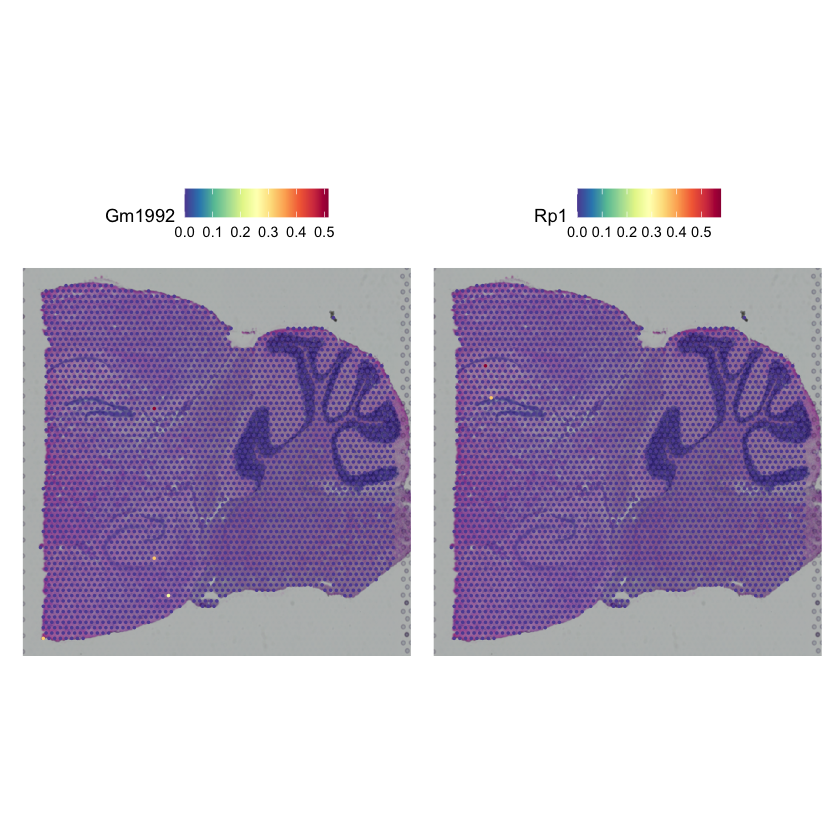

In [11]:
# Visualize the expression of random genes for Section 1
SpatialFeaturePlot(section1_data, features = c("Gm1992", "Rp1"))

## 3 Data preprocessing (4P) 
### 3.1 Filtering
Filter the data for preprocessing. Choose reasonable cut-off values and justify them using suitable plots. Ensure the cut-off values are not set too low. Compare these thresholds with those used in the scRNA-seq data from the first project and explain the differences considering how spatial transcriptomics data are produced.

Warning message:
"The following requested variables were not found: percent.mt"


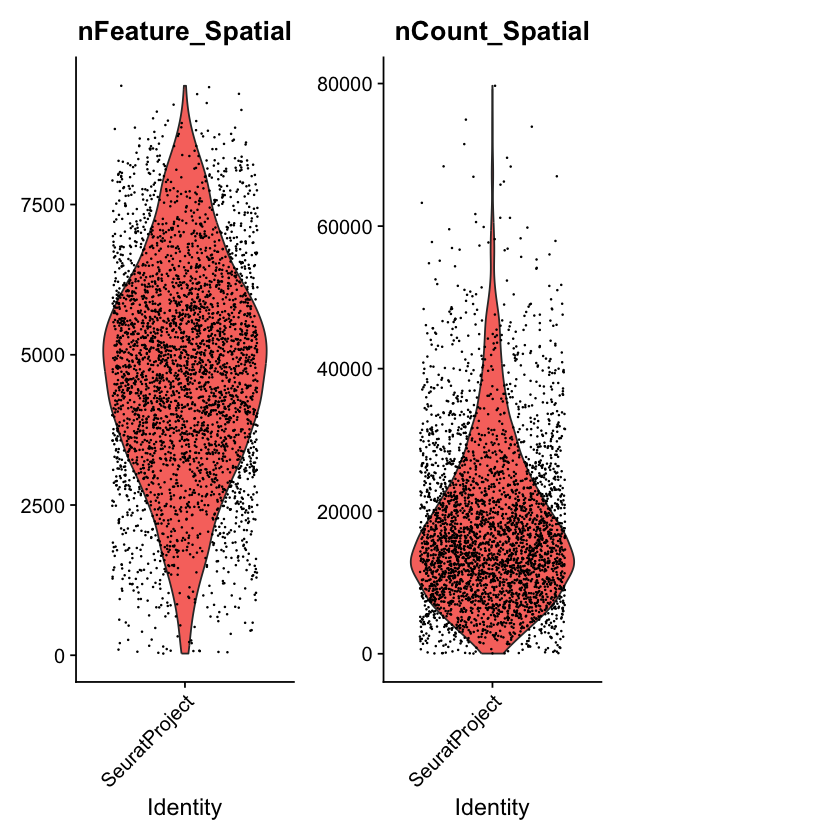

In [12]:
VlnPlot(section1_data, features = c("nFeature_Spatial", "nCount_Spatial", "percent.mt"), ncol = 3)

In scRNA-seq, thresholds (200–2500) are used to filter individual cells, where outliers might represent dying cells or doublets.
In spatial transcriptomics, each spot aggregates gene expression from multiple cells. Therefore:
- Lower thresholds ensure tissue coverage while excluding background.
- Higher thresholds avoid over-filtering as more cells might contribute to a single spot.

In [13]:
# section1_data <- subset(section1_data, subset = nFeature_Spatial > 2000 & nFeature_Spatial < 7500)
section1_data_Filtered <- subset(section1_data, 
                                 subset = nFeature_Spatial > 2500 & nFeature_Spatial < 7500 & 
                                 nCount_Spatial < 60000)


Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating Centroids objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating FOV objects"
Warning message:
"Not validating Seurat objects"


Warning message:
"The following requested variables were not found: percent.mt"


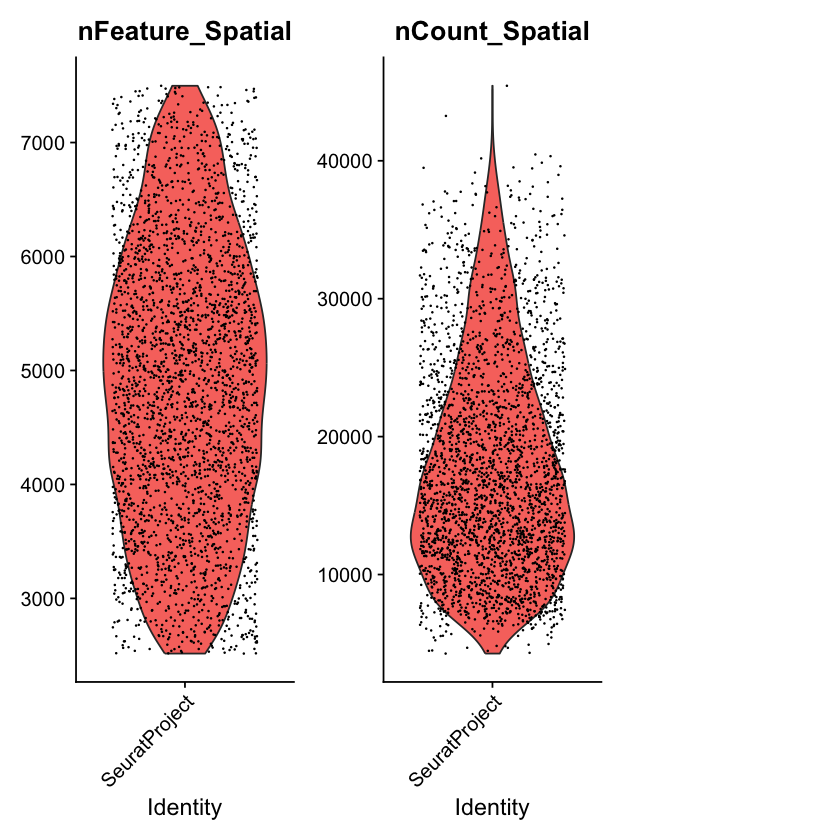

In [14]:
# Visualize gene count and mitochondrial content distributions (Section 1)
VlnPlot(section1_data_Filtered, features = c("nFeature_Spatial", "nCount_Spatial", "percent.mt"), ncol = 3)

### 3.2 Apply SCTransform
Use SCTransform for further preprocessing. Indicate which preprocessing steps from Project 1 are replaced by
this function. If issues arise, replace them with the corresponding steps from Project 1.

In [15]:
# Apply SCTransform for normalization and variance stabilization
section1_data_Filtered <- SCTransform(section1_data_Filtered, assay = "Spatial", verbose = FALSE)

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = co

In Project 1, the preprocessing steps performed instead of SCTransform include:

**Normalization:**

NormalizeData() was used to normalize the gene expression values for each cell by the total expression and scale it to a common scale (log-transformed counts per cell).

**Variable Feature Selection:**

FindVariableFeatures() was used to identify the top 2000 variable genes, which are informative for downstream analyses like PCA and clustering.

**Scaling:**

ScaleData() was applied to scale the data to have a mean of 0 and a standard deviation of 1 for each gene, enabling PCA to focus on meaningful variance.

**Principal Component Analysis (PCA):**

RunPCA() was used for dimensionality reduction based on the selected variable features.

## 4 Dimensionality reduction, clustering, and visualization (3P) 
### 4.1 Dimensionality reduction
Perform dimensionality reduction using PCA with UMAP and plot it in 2D space. Use a plot to explain the number of dimensions chosen.

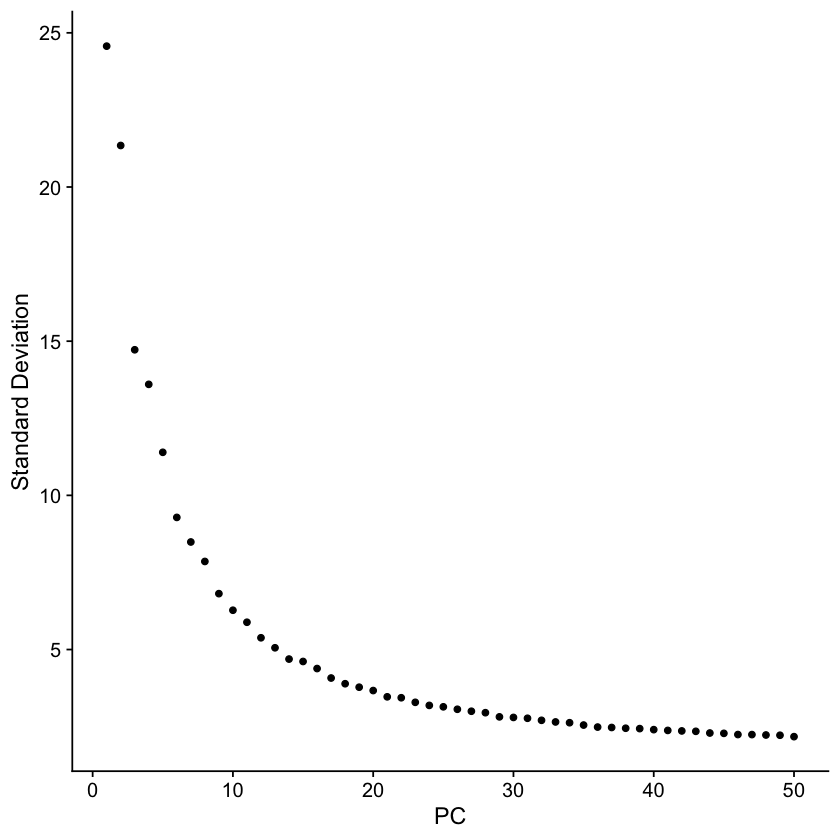

In [16]:
# Perform PCA
section1_data_Filtered <- RunPCA(section1_data_Filtered, assay = "SCT", verbose = FALSE)

# Visualize variance explained by PCs to decide the number of dimensions to retain
ElbowPlot(section1_data_Filtered, ndims = 50)

In this case, the elbow point is around **10 PCs**, as the variance starts to level off after the 10th PC.

### 4.2 Clustering
Cluster the data based on the PCA results. Display the clustering in the 2D UMAP space and on the tissue slide (1 plot each).

In [17]:
# Choose the number of dimensions based on the Elbow Plot (e.g., 10 PCs)
dims_to_use <- 1:10

# Run UMAP using the first 10 PCs (adjust based on ElbowPlot)
section1_data_Filtered <- RunUMAP(section1_data_Filtered, dims = dims_to_use)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
11:18:16 UMAP embedding parameters a = 0.9922 b = 1.112

11:18:16 Read 2742 rows and found 10 numeric columns

11:18:16 Using Annoy for neighbor search, n_neighbors = 30

11:18:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:18:16 Writing NN index file to temp file /var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T//RtmpGqPl7Q/file10e256d62b5bb

11:18:16 Searching Annoy index using 1 thread, search_k = 3000

11:18:17 Annoy recall = 100%

11:18:18 Commencing smooth kNN distance calibra

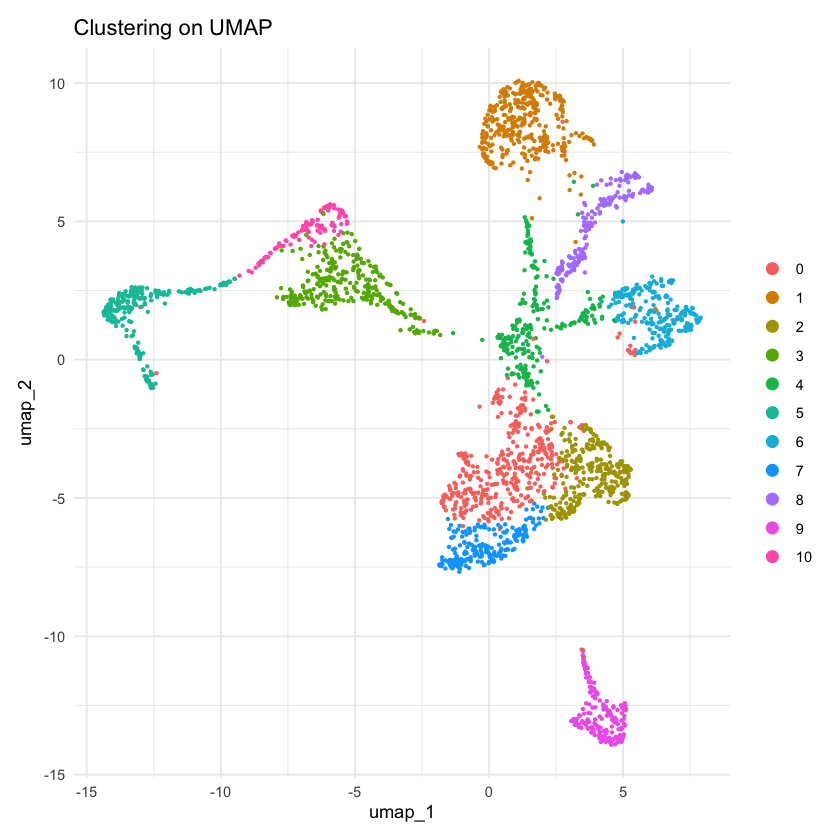

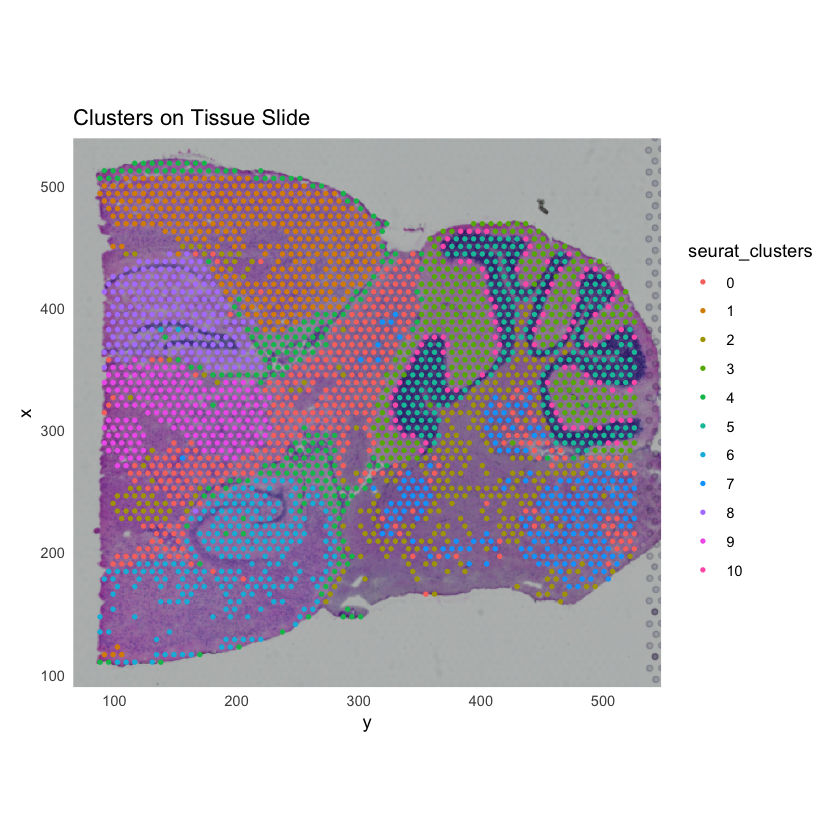

In [18]:
# Find neighbors and clusters
section1_data_Filtered <- FindNeighbors(section1_data_Filtered, dims = dims_to_use, verbose = FALSE)
section1_data_Filtered <- FindClusters(section1_data_Filtered, resolution = 0.5, verbose = FALSE)

# View clusters in UMAP space
DimPlot(section1_data_Filtered, reduction = "umap", group.by = "seurat_clusters") +
  ggtitle("Clustering on UMAP") +
  theme_minimal()
  
# Plot clusters on the tissue slide
SpatialDimPlot(section1_data_Filtered, group.by = "seurat_clusters", crop = TRUE) +
  ggtitle("Clusters on Tissue Slide") +
  theme_minimal()

In [17]:
# Save normalized data
saveRDS(section1_data_Filtered, file = "section1_normalized_data.rds")

***

# Week 2: (15 Points)
## 5 Differential Expression Analysis (8P)
For this task, pick one of the samples to perform the analysis.

In [28]:
head(section1_data_Filtered@meta.data)

orig.ident    nCount_Spatial nFeature_Spatial nCount_SCT
AAACAAGTATCTCCCA-1 SeuratProject  9195          3089             15548     
AAACACCAATAACTGC-1 SeuratProject 33655          6468             17039     
AAACAGAGCGACTCCT-1 SeuratProject 19619          5245             17418     
AAACAGCTTTCAGAAG-1 SeuratProject 13420          4107             15505     
AAACAGGGTCTATATT-1 SeuratProject 12010          3618             15455     
AAACCCGAACGAAATC-1 SeuratProject 17798          5400             17109     
                   nFeature_SCT SCT_snn_res.0.5 seurat_clusters
AAACAAGTATCTCCCA-1 3243         2               2              
AAACACCAATAACTGC-1 5054         6               6              
AAACAGAGCGACTCCT-1 5233         3               3              
AAACAGCTTTCAGAAG-1 4103         9               9              
AAACAGGGTCTATATT-1 3612         0               0              
AAACCCGAACGAAATC-1 5384         2               2

In [19]:
# Extract the specific cell barcode
specific_sample <- subset(section1_data_Filtered, nCount_Spatial = 9195)

Warning message:
"The following arguments are not used: nCount_Spatial"


In [32]:
specific_sample

An object of class Seurat 
50183 features across 2742 samples within 2 assays 
Active assay: SCT (17898 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 spatial field of view present: slice1

### 5.1 DEG (Differentially Expressed Genes) analysis based on clustering
Compare gene expression between different clusters. Perform a DEG analysis only based on the gene expression data. Save the differentially expressed genes for use in the next task.

In [20]:
# Set the active identity to clusters
Idents(section1_data_Filtered) <- "seurat_clusters"

# Perform differential expression analysis between two clusters (e.g., cluster 1 and cluster 2)
cluster_markers <- FindMarkers(section1_data_Filtered, ident.1 = 1, ident.2 = 2, min.pct = 0.25, logfc.threshold = 0.25)

# View the top differentially expressed genes
head(cluster_markers)

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



p_val         avg_log2FC pct.1 pct.2 p_val_adj    
Mag   2.487962e-109 -3.797586  0.597 1.000 4.452955e-105
Nrgn  3.175020e-109  4.418043  1.000 0.945 5.682651e-105
Trf   4.675440e-109 -4.218970  0.703 1.000 8.368103e-105
Mog   5.937800e-109 -4.000640  0.378 1.000 1.062747e-104
Ctxn1 7.361773e-109  3.719742  1.000 0.529 1.317610e-104
Plp1  1.312606e-108 -4.414138  0.881 1.000 2.349302e-104

In [26]:
# Save the DEG results to a CSV file for use in the next task
write.csv(cluster_markers, file = "differentially_expressed_genes.csv")

### 5.2 DEG analysis based on the spatial patterning
Use spatial information to find differentially expressed genes in the spatial transcriptomics data. Use Seurat to identify the top 3 spatially variable features. Visualize the expression of these 3 genes in the tissue slide. Are these genes also differentially expressed between clusters, as identified in Task 4.1?

In [21]:
cluster_markers <- FindAllMarkers(
  section1_data_Filtered,
  assay = "Spatial",
  test.use = "wilcox",        # Wilcoxon rank-sum test for DEG analysis
  min.pct = 0.25,             # Minimum fraction of spots expressing a gene
  logfc.threshold = 0.25      # Minimum log-fold change
)


Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



In [36]:
# View the top markers
head(cluster_markers)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene   
Slc6a11 9.009033e-92  1.5473100 0.925 0.637 2.908566e-87 0       Slc6a11
Slc17a7 4.666374e-85 -1.7189013 0.769 0.921 1.506539e-80 0       Slc17a7
Agt     4.597783e-72  1.2974310 0.950 0.708 1.484394e-67 0       Agt    
Adcy1   3.177837e-64 -1.8503480 0.719 0.888 1.025965e-59 0       Adcy1  
Sparc   1.860095e-63  0.7678317 0.997 0.985 6.005317e-59 0       Sparc  
Resp18  3.207177e-63  1.3138508 0.932 0.723 1.035437e-58 0       Resp18

In [37]:
# Save differentially expressed genes (DEGs) to a CSV file
write.csv(cluster_markers, file = "~/Documents/GitHub/SingleCell_Project_3/DEGs_by_clusters.csv")

Warning message in DoHeatmap(section1_data_Filtered, features = top_markers$gene):
"The following features were omitted as they were not found in the scale.data slot for the SCT assay: Corin, Dio3, Ovol2, 9130024F11Rik"


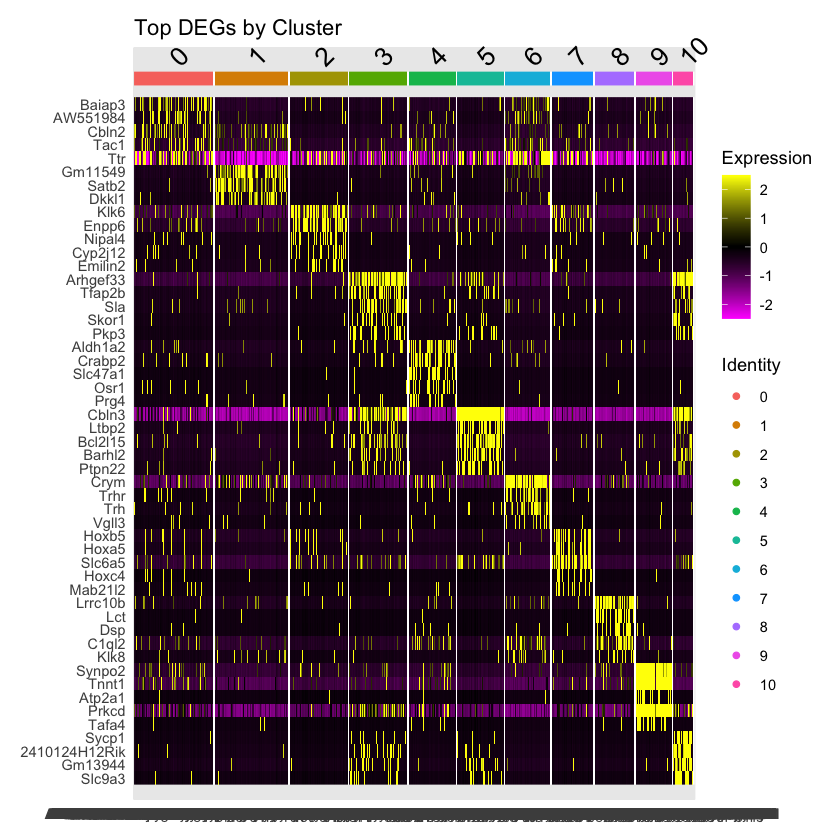

In [22]:
# Visualize top DEGs for each cluster
top_markers <- cluster_markers %>% 
  group_by(cluster) %>% 
  top_n(n = 5, wt = avg_log2FC)

# Heatmap for top markers across clusters
DoHeatmap(section1_data_Filtered, features = top_markers$gene) +
  ggtitle("Top DEGs by Cluster") +
  theme_minimal()


**Are these genes also differentially expressed between clusters, as identified in Task 4.1?**


## 6 Merging the data (7P)
### 6.1 Merging without Batch-correction (3P)
Merge the two datasets without batch correction. Repeat the necessary pre-processing, dimensionality reduction, and clustering steps for the merged dataset. Show the clustering in the UMAP and tissue slides. Compare the clustering between the two tissues:

• Which clusters are present in both samples? 

• Which clusters are unique to one sample?

In [31]:
# Check the header of the tissue_positions_list.csv file
coordinates <- Seurat::Read10X_Coordinates("~/Downloads/project_3_dataset/Section_1/spatial/tissue_positions_list.csv", filter.matrix = TRUE)

is.numeric(coordinates)

head(coordinates)

[1] FALSE

tissue row col imagerow imagecol
TGGGACCATTGGGAGT-1 1      7    5  2257     1776    
CCGGTGCGAGTGATAG-1 1      7    7  2257     1914    
TAGCCAGAGGGTCCGG-1 1      7    9  2257     2052    
GAAGGGCATAACCATG-1 1      7   11  2257     2189    
CAACATGGCCTGATAA-1 1      6   12  2137     2258    
CAATTTGACCGGGAAG-1 1      7   13  2257     2327

In [32]:
# Check the header of the tissue_positions_list.csv file
coordinates <- Seurat::Read10X_Coordinates("~/Downloads/project_3_dataset/Section_2/spatial/tissue_positions_list.csv", filter.matrix = TRUE)

is.numeric(coordinates)

head(coordinates)

[1] FALSE

tissue row col imagerow imagecol
TCCGCAGCCACCTAGC-1 1      13  7   3110     2015    
GGTCCTTCATACGACT-1 1      13  9   3110     2153    
GTGCCTAGCTATGCTT-1 1      13  11  3110     2290    
GCGAGAAACGGGAGTT-1 1      13  13  3110     2428    
CATTGTGTGCTAGATC-1 1      13  15  3110     2566    
GAAATGGGATGTAAAC-1 1      13  17  3110     2703

In [36]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"
section2_path <- "Section_2"

list.files(section1_path)
list.files(section2_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

section2_data <- Load10X_Spatial(data.dir = section2_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
                 
# Combine section1_data and section2_data
combined_data <- merge(section1_data, y = section2_data, add.cell.ids = c("Section1", "Section2"))

# Print the combined data
print(combined_data)

[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

[1] "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5"
[2] "spatial"

Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"


An object of class Seurat 
32285 features across 6644 samples within 1 assay 
Active assay: Spatial (32285 features, 0 variable features)
 2 layers present: counts.1, counts.2
 2 spatial fields of view present: slice1 slice1.2


In [37]:
# Repeat the necessary pre-processing,
# dimensionality reduction, and clustering steps for the merged dataset

# Preprocessing
combined_data <- SCTransform(combined_data, assay = "Spatial", verbose = FALSE)

# Dimensionality reduction
combined_data <- RunPCA(combined_data, verbose = FALSE)
combined_data <- RunUMAP(combined_data, dims = dims_to_use, verbose = FALSE)

# Clustering
combined_data <- FindNeighbors(combined_data, dims = dims_to_use)
combined_data <- FindClusters(combined_data, resolution = 0.5)


`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = co

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6644
Number of edges: 195778

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9156
Number of communities: 14
Elapsed time: 0 seconds


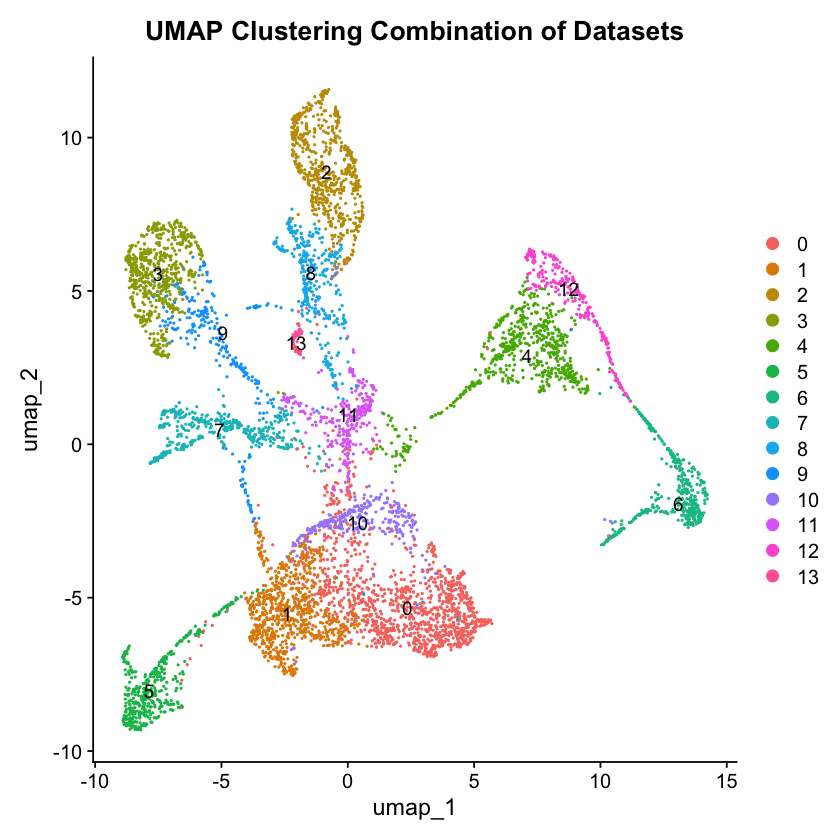

In [74]:
# Show the clustering in the UMAP and tissue slides

# Visualize UMAP
DimPlot(combined_data, reduction = "umap", group.by = "seurat_clusters", label = TRUE) + ggtitle("UMAP Clustering Combination of Datasets")


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3355
Number of edges: 96702

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9065
Number of communities: 12
Elapsed time: 0 seconds


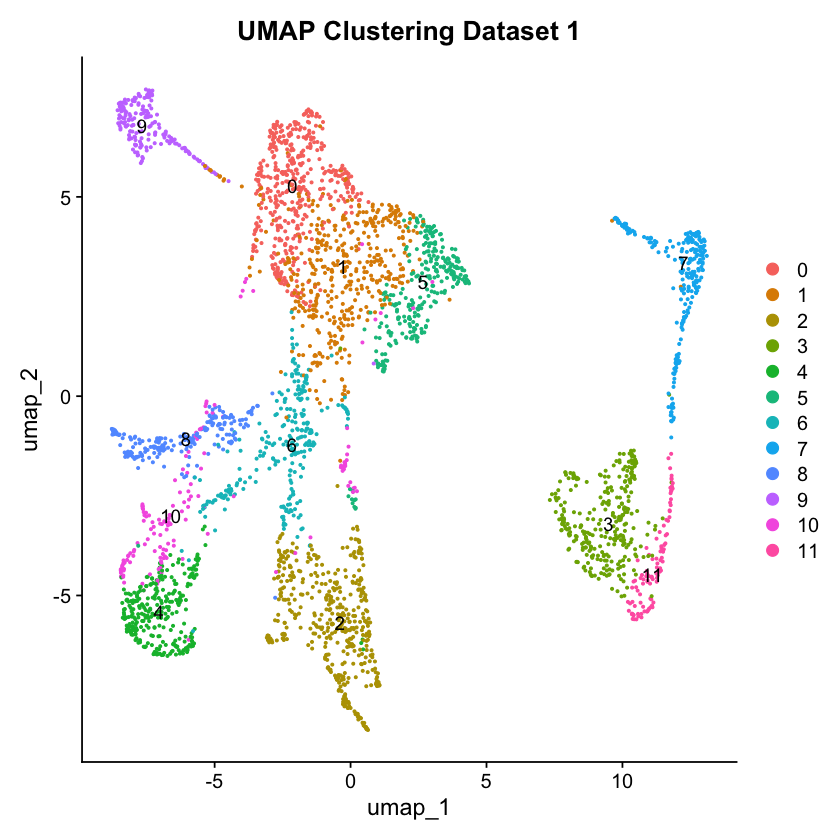

In [73]:
section1_data <- SCTransform(section1_data, assay = "Spatial", verbose = FALSE)

# Dimensionality reduction
section1_data <- RunPCA(section1_data, verbose = FALSE)
section1_data <- RunUMAP(section1_data, dims = dims_to_use, verbose = FALSE)

# Clustering
section1_data <- FindNeighbors(section1_data, dims = dims_to_use)
section1_data <- FindClusters(section1_data, resolution = 0.5)

DimPlot(section1_data, reduction = "umap", group.by = "seurat_clusters", label = TRUE) + ggtitle("UMAP Clustering Dataset 1")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3289
Number of edges: 93767

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9076
Number of communities: 13
Elapsed time: 0 seconds


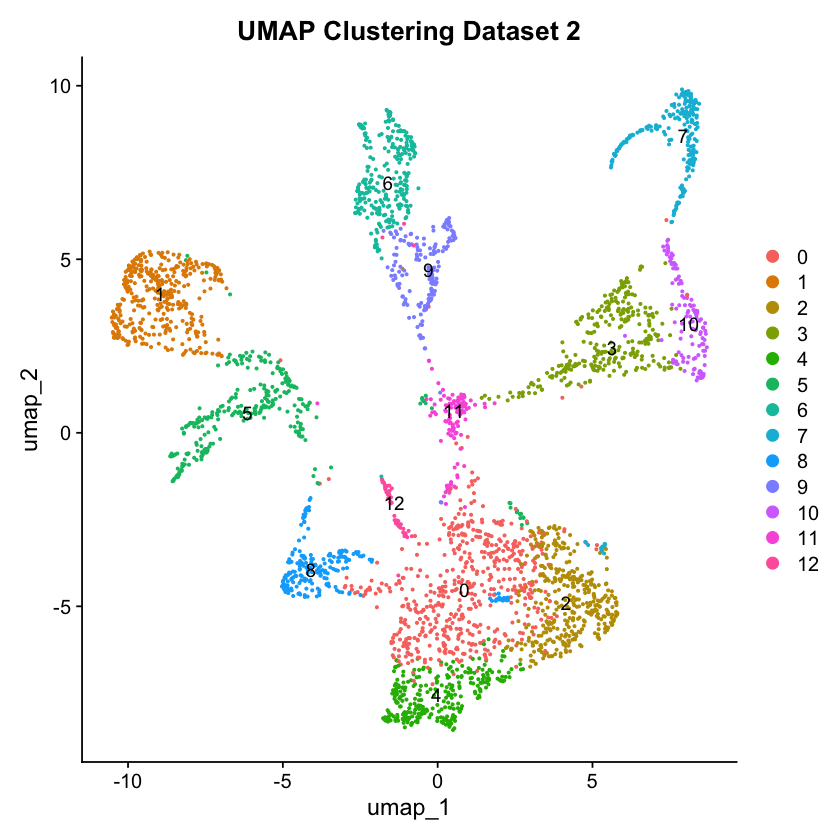

In [72]:
section2_data <- SCTransform(section2_data, assay = "Spatial", verbose = FALSE)

# Dimensionality reduction
section2_data <- RunPCA(section2_data, verbose = FALSE)
section2_data <- RunUMAP(section2_data, dims = dims_to_use, verbose = FALSE)

# Clustering
section2_data <- FindNeighbors(section2_data, dims = dims_to_use)
section2_data <- FindClusters(section2_data, resolution = 0.5)

DimPlot(section2_data, reduction = "umap", group.by = "seurat_clusters", label = TRUE) + ggtitle("UMAP Clustering Dataset 2")

In [71]:
# Identify clusters in both samples
clusters_dataset1 <- unique(Idents(section1_data))
clusters_dataset2 <- unique(Idents(section2_data))

clusters_both <- intersect(clusters_dataset1, clusters_dataset2)

clusters_unique_dataset1 <- setdiff(clusters_dataset1, clusters_dataset2)
clusters_unique_dataset2 <- setdiff(clusters_dataset2, clusters_dataset1)

# Print comparison
cat("Clusters present in both samples:", clusters_both, "\n")
cat("Clusters unique to dataset1:", clusters_unique_dataset1, "\n")
cat("Clusters unique to dataset2:", clusters_unique_dataset2, "\n")



Clusters present in both samples: 0 1 3 9 2 7 6 5 4 8 10 11 
Clusters unique to dataset1:  
Clusters unique to dataset2: 12 


### 6.2 Merging with Batch-correction (3P)
Use Data Integration to combine the two datasets. Repeat the necessary pre-processing, dimensionality reduc- tion, and clustering steps. Display the results in 2D UMAP space.

In [96]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"
section2_path <- "Section_2"

list.files(section1_path)
list.files(section2_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

section2_data <- Load10X_Spatial(data.dir = section2_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
                 


[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

[1] "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5"
[2] "spatial"

In [99]:
# # Preprocessing for each dataset
section1_data <- SCTransform(section1_data, assay = "Spatial", verbose = FALSE)
section2_data <- SCTransform(section2_data, assay = "Spatial", verbose = FALSE)

In [100]:
# Identify integration anchors
features <- SelectIntegrationFeatures(object.list = list(section1_data, section2_data), nfeatures = 3000)

In [101]:
section1_data <- PrepSCTIntegration(object = section1_data, anchor.features = features, verbose = FALSE)

ERROR: Error in as.list.default(X): no method for coercing this S4 class to a vector


In [102]:
section2_data <- PrepSCTIntegration(object = section2_data, anchor.features = features)
anchors <- FindIntegrationAnchors(object.list = list(section1_data, section2_data), normalization.method = "SCT", anchor.features = features)

ERROR: Error in as.list.default(X): no method for coercing this S4 class to a vector


In [103]:
# Integrate data
integrated_data <- IntegrateData(anchorset = anchors, normalization.method = "SCT")


ERROR: Error: object 'anchors' not found


### 6.3 Detection of Batch-effects (1P)
Compare the results from both methods. Determine if batch effects have been resolved. Decide whether batch correction is necessary and justify your choice. Use the appropriate data for further processing.

# Week 3: (17 Points)
## 7 Cell-type identification (8P)
### 7.1 Automatic Annotation using Data Integration (5P)
Download the reference dataset and prepare the data using SCTransform, dimensionality reduction, and cluster-
ing. Transfer the labels of the scRNA-seq dataset to the spatial transcriptomics dataset. Plot the annotation in the UMAP space.

Hint: Refer to the tutorial: https://learn.gencore.bio.nyu.edu/seurat-integration-and-label-transfer/

In [104]:
# refrence data
cortex.data <- readRDS(file = "~/Downloads/project_3_dataset/allen_cortex.rds")

In [105]:
#define directory with scRNAseq data
setwd("~/Downloads/project_3_dataset/")

# Define file paths for Section 1 and Section 2
section1_path <- "Section_1"
section2_path <- "Section_2"

list.files(section1_path)
list.files(section2_path)

# Load spatial transcriptomics data
section1_data <- Load10X_Spatial(data.dir = section1_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

section2_data <- Load10X_Spatial(data.dir = section2_path, 
                                 filename = "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
                 


[1] "V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5"
[2] "spatial"

[1] "V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5"
[2] "spatial"

In [114]:
# Combine section1_data and section2_data
combined_data <- merge(section1_data, y = section2_data, add.cell.ids = c("Section1", "Section2"))

# Repeat the necessary pre-processing,
# dimensionality reduction, and clustering steps for the merged dataset

# Preprocessing
combined_data <- SCTransform(combined_data, assay = "Spatial", verbose = FALSE)

# Dimensionality reduction
combined_data <- RunPCA(combined_data, verbose = FALSE)
combined_data <- RunUMAP(combined_data, dims = dims_to_use, verbose = FALSE)

# Clustering
combined_data <- FindNeighbors(combined_data, dims = dims_to_use)
combined_data <- FindClusters(combined_data, resolution = 0.5)


Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6644
Number of edges: 195884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9149
Number of communities: 13
Elapsed time: 0 seconds


In [110]:
# Check available assays in the cortex.data object
cortex.data

An object of class Seurat 
34617 features across 14249 samples within 1 assay 
Active assay: RNA (34617 features, 0 variable features)
 2 layers present: counts, data

In [112]:
# Preprocessing the reference dataset
cortex.data <- SCTransform(cortex.data, assay = "RNA", verbose = FALSE)
cortex.data <- RunPCA(cortex.data, verbose = FALSE)
cortex.data <- RunUMAP(cortex.data, dims = dim_to_use, verbose = FALSE)
cortex.data <- FindNeighbors(cortex.data, dims = dim_to_use)
cortex.data <- FindClusters(cortex.data, resolution = 0.5)

In [117]:
# Preprocessing the combined_data transcriptomics dataset
# combined_data <- SCTransform(combined_data, assay = "Spatial", verbose = FALSE)
# combined_data <- RunPCA(combined_data, verbose = FALSE)
# Find anchors for label transfer
# anchors <- FindTransferAnchors(reference = cortex.data, query = combined_data, normalization.method = "SCT")

# # Transfer cell type labels from reference to combined_data dataset
# combined_data <- MapQuery(
#   anchorset = anchors, 
#   query = combined_data, 
#   reference = cortex.data, 
#   refdata = Idents(cortex.data), 
#   reference.reduction = "pca"
# )

# # Run UMAP on combined_data data using reference anchors
# combined_data <- RunUMAP(combined_data, reduction = "ref.pca", dims = 1:30)

# # Plot the UMAP with predicted labels
# DimPlot(combined_data, reduction = "umap", group.by = "predicted.id", label = TRUE) +
#   ggtitle("UMAP with Transferred Cell Type Annotations")


ERROR: Error in slot(object = reference[[reference.assay]], name = "SCTModel.list"): no slot of name "SCTModel.list" for this object of class "Assay"
